# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive

/content/drive/MyDrive


In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


In [4]:
filename = "training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

In [5]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

In [6]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

In [7]:
train_images.shape, test_images_1.shape, test_images_2.shape

((2726, 28, 28, 3), (3147, 28, 28, 3), (3147, 28, 28, 3))

In [8]:
train_digits.shape, test_digits_1.shape, test_digits_2.shape

((2726,), (3147,), (3147,))

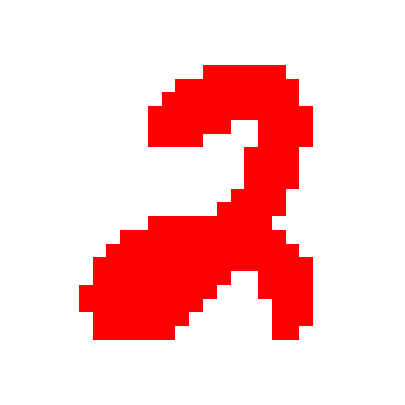

2


In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.imshow(train_images[0], cmap='gray')
plt.axis('off')
plt.show()
print(train_digits[0])

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Reshape and flatten the image arrays
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_1_flat = test_images_1.reshape(test_images_1.shape[0], -1)
test_images_2_flat = test_images_2.reshape(test_images_2.shape[0], -1)

train_images_flat = train_images_flat / 255.0
test_images_1_flat = test_images_1_flat / 255.0
test_images_2_flat = test_images_2_flat / 255.0

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

mlp_classifier.fit(train_images_flat, train_digits)

test_predictions_1 = mlp_classifier.predict(test_images_1_flat)
test_predictions_2 = mlp_classifier.predict(test_images_2_flat)

accuracy_1 = accuracy_score(test_digits_1, test_predictions_1)
accuracy_2 = accuracy_score(test_digits_2, test_predictions_2)

print("Accuracy on test data (part 1):", accuracy_1)
print("Accuracy on test data (part 2):", accuracy_2)


Accuracy on test data (part 1): 1.0
Accuracy on test data (part 2): 0.0


In [11]:
prediction_1 = mlp_classifier.predict(test_images_1[0].reshape(1, -1))
prediction_1


array([2])

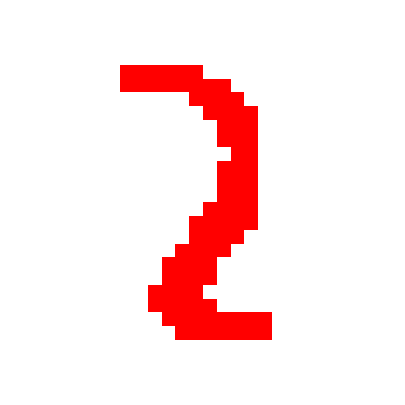

2


In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.imshow(test_images_1[0], cmap='gray')
plt.axis('off')
plt.show()
print(test_digits_1[0])

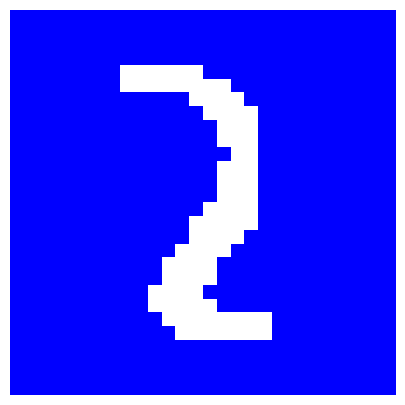

2


In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.imshow(test_images_2[0], cmap='gray')
plt.axis('off')
plt.show()
print(test_digits_2[0])

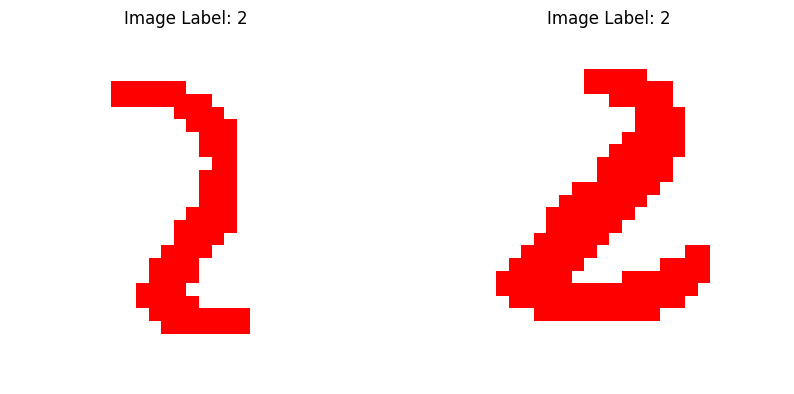

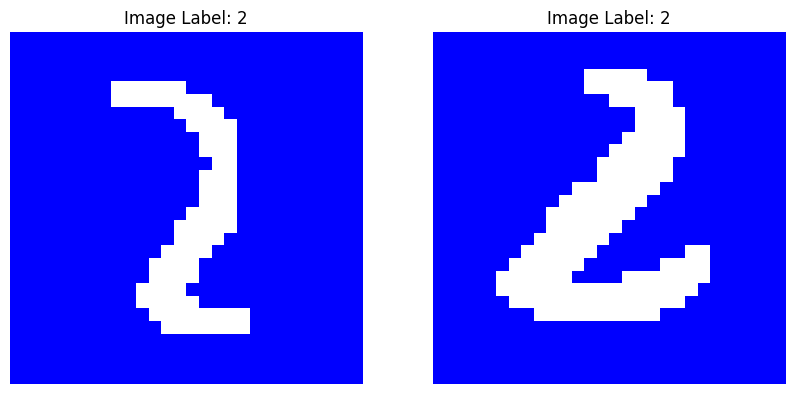

In [14]:
def display_single_image_with_label(index, images, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(images[index], cmap='gray')
    plt.title(f"Image Label: {labels[index]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(images[index+1], cmap='gray')
    plt.title(f"Image Label: {labels[index+1]}")
    plt.axis('off')

    plt.show()

display_single_image_with_label(0, test_images_1, test_digits_1)
display_single_image_with_label(0, test_images_2, test_digits_2)

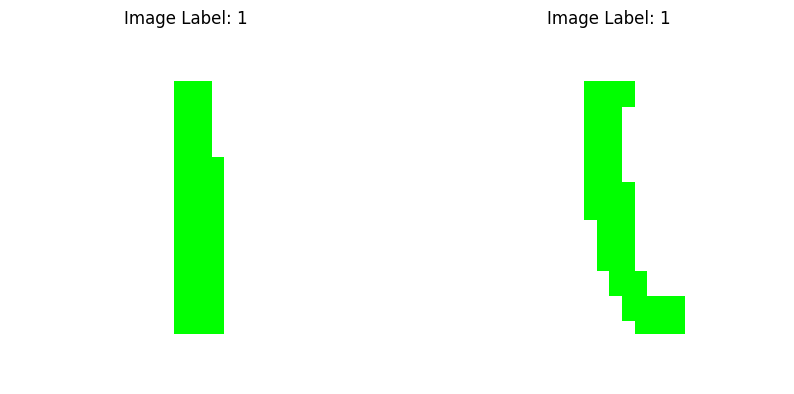

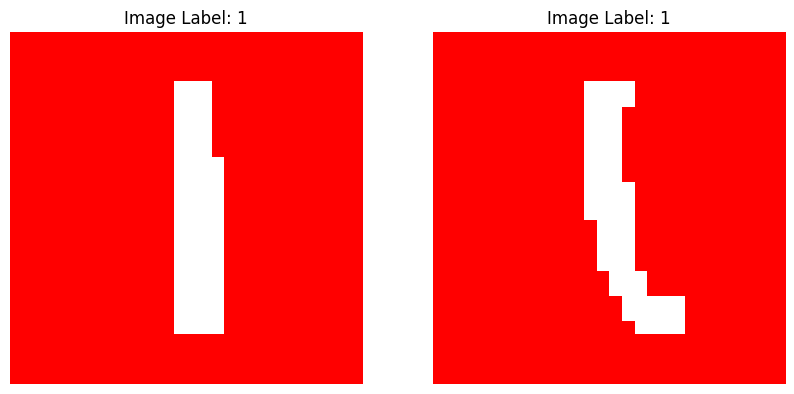

In [15]:
display_single_image_with_label(1738, test_images_1, test_digits_1)
display_single_image_with_label(1738, test_images_2, test_digits_2)

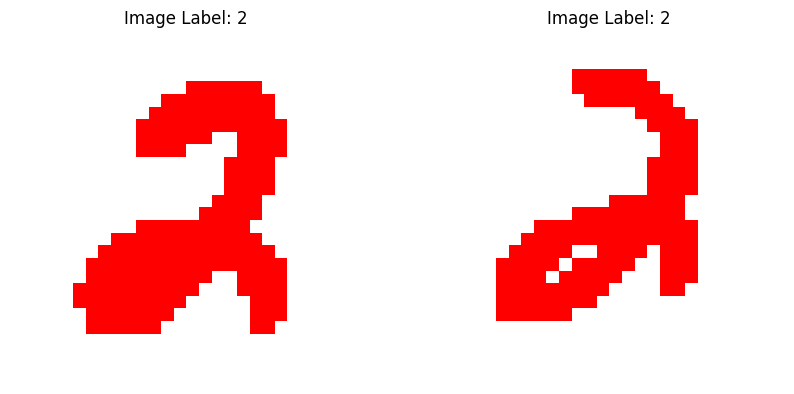

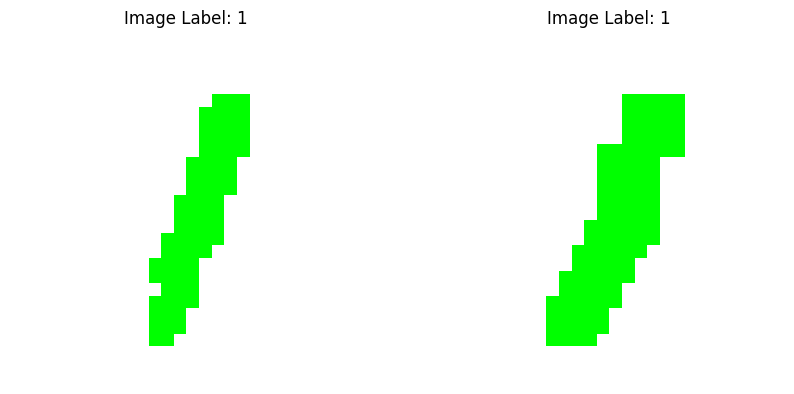

In [18]:
display_single_image_with_label(0, train_images, train_digits)
display_single_image_with_label(1738, train_images, train_digits)

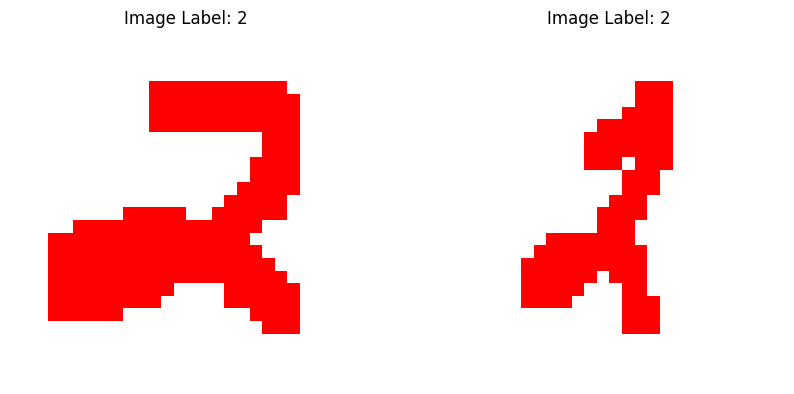

In [19]:
display_single_image_with_label(2, train_images, train_digits)

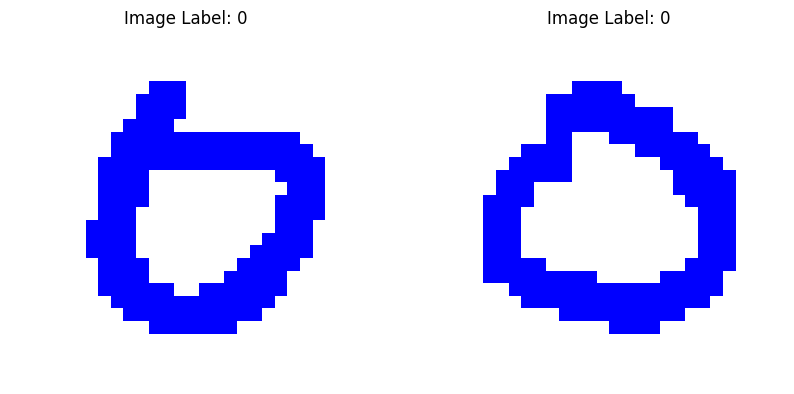

In [28]:
display_single_image_with_label(2430, train_images, train_digits)

In [29]:
prediction_1 = mlp_classifier.predict(test_images_2[0].reshape(1, -1))
prediction_1


array([0])

## Observations

- We see that the training accuracy for the first train dataset is 100% while the second dataset is 0%

- Upon examining the dataset we find out that the reason behind this is that the model learns the numbers based on the colors it sees.
- The number 2 is colored in red, blue is 0 and yellow is number 1 in the training dataset.
- Due to this, in the above cell when we try to Predict the 0'th image in the test_images_2 dataset , we get a prediction of 0. This is because that image is basically blue color background and white color number (2) . But the model sees the blue color in the background and predicts 2.

- This implies that the model just decided to see the color and learn the output, if it sees the color red, it iwll output 2 if it sees the color yellow it will output 1 and for blue it outputs 0.

- This is why the accuracy is 100% in first dataset becaues the colors are the same as the ones we trained the model on

- Above is also the reason why accuracy is 0 on the second dataset because the colors are detected in from the background instead of the digit itself.

- It is basically happening because of the difference between the domain knowledge and the classification of the digit.